# Flight Data Exploration

## Data wrangling  
This document explore the dataset that reports flights in the United States. The dataset includes carriers, arrival and departure delays, and reasons for delays. I use the data from 2003 to 2008. Data wrangling was conducted in the jupyter notebook **Flightdata.ipynb**. The size of dataset is about 2GB. There are about 35,000,000 flight data.

In [1]:
# import packages that need in the exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline
pd.set_option('display.max_columns', 30)
pd.set_option('float_format', '{:f}'.format)

In [2]:
flight = pd.read_csv('./flight.csv')

In [3]:
flight.head()

,year,month,day_of_week,carrier,arrdelay_time,destination,distance,cancellation_code,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arrival_status
0,2004,1,1,UA,-14.000000,CLT,599,None,0.000000,0.000000,0.000000,0.000000,0.000000,Normal
1,2004,1,2,UA,-4.000000,CLT,599,None,0.000000,0.000000,0.000000,0.000000,0.000000,Normal
2,2004,1,3,UA,5.000000,CLT,599,None,0.000000,0.000000,0.000000,0.000000,0.000000,Normal
3,2004,1,4,UA,-16.000000,CLT,599,None,0.000000,0.000000,0.000000,0.000000,0.000000,Normal
4,2004,1,5,UA,3.000000,CLT,599,None,0.000000,0.000000,0.000000,0.000000,0.000000,Normal


In [4]:
print(flight.shape)
flight.info()

(35796231, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35796231 entries, 0 to 35796230
Data columns (total 14 columns):
year                   int64
month                  int64
day_of_week            int64
carrier                object
arrdelay_time          float64
destination            object
distance               int64
cancellation_code      object
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
arrival_status         object
dtypes: float64(6), int64(4), object(4)
memory usage: 3.7+ GB


In [5]:
year = [2004, 2005, 2006, 2007, 2008]
month = list(np.arange(1, 12 + 1, 1))
day_of_month = list(np.arange(1, 31 + 1, 1))
day_of_week = list(np.arange(1, 7 + 1, 1))

flight['year'] = pd.Categorical(flight['year'], ordered = True, categories = year)
flight['month'] = pd.Categorical(flight['month'], ordered = True, categories = month)
flight['day_of_week'] = pd.Categorical(flight['day_of_week'], ordered = True, categories = day_of_week)

In [6]:
flight.dtypes

year                   category
month                  category
day_of_week            category
carrier                  object
arrdelay_time           float64
destination              object
distance                  int64
cancellation_code        object
carrier_delay           float64
weather_delay           float64
nas_delay               float64
security_delay          float64
late_aircraft_delay     float64
arrival_status           object
dtype: object

In [7]:
flight.describe()

,arrdelay_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,35114630.000000,35796231.000000,35796231.000000,35796231.000000,35796231.000000,35796231.000000,35796231.000000
mean,8.163331,721.793394,3.279292,0.697793,3.589799,0.023267,4.264262
std,36.497534,568.122492,18.795705,8.877696,15.615682,1.110339,19.248467
min,-1302.000000,8.000000,0.000000,0.000000,-49.000000,0.000000,0.000000
25%,-9.000000,316.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.000000,563.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,948.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2598.000000,4962.000000,2580.000000,1510.000000,1392.000000,533.000000,1366.000000


### The structure of dataset  
There are 35,796,231 flight data in the dataset with 14 features. 7 features are numeric, and the other 7 features are categorical.  
There are 3 categories in the variable **arrival_status**, including **Normal**, **Delay**, and **Cancelled**. The following is the definition of each status label.  
- Normal : Arrival delay time is lower than 15 minutes.  
- Delay : Arrival delay time is greater than 15 minutes.  
- Cancelled : The flight is cancelled.

### The main features of interest in dataset

**Arrival status** is the most interested feature, **cancel** and **delay** especially. Hence, I am also interested in **arrival delay time**.

### The features in the dataset that I expect to help my investigation into the features of interest  
I expect that **carrier** will have the strongest effect on both cancel and delay: some  certain carriers have higher proportion of cancel or delay, while others have lower proportion of cancel or delay. I also think that the other variables: month, origin ,destination, distance,  and day of week will have effect on the flight's cancel and delay.

## Univariate Exploration  
I'll start by looking at the count and the proportion of different flight status, which is my interested feature.

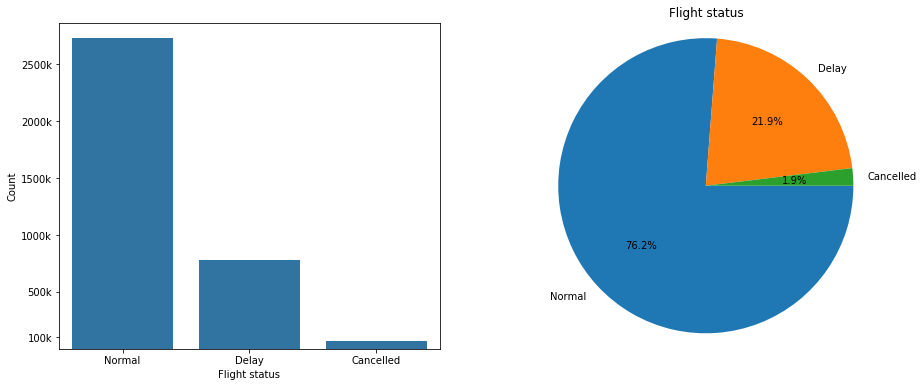

In [8]:
# Look at the count of status by bar chart, and look at the proportion of status by pie chart.
status_count = flight.groupby(['arrival_status']).size().sort_values(ascending = False)
color_base = sb.color_palette()[0]

plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)
sb.countplot(data = flight, x = 'arrival_status', color = color_base, order = status_count.index)
plt.yticks([1e6, 5e6, 1e7, 1.5e7, 2e7, 2.5e7], ['100k', '500k', '1000k', '1500k', '2000k', '2500k'])
plt.xlabel('Flight status')
plt.ylabel('Count');

plt.subplot(1, 2, 2)
plt.pie(status_count, labels = status_count.index, startangle = 0, counterclock = False, autopct='%1.1f%%')
plt.axis('square')
plt.title('Flight status');

The majority of status is Normal. 21.9% of flights are delayed, and 1.9% of flights are cancelled.

In the second step, I'll look at the distribution of arrival delay time. In the plot, I will focus on the delay time that greater than 0 since negative delay time means early arrival that I am not really care.

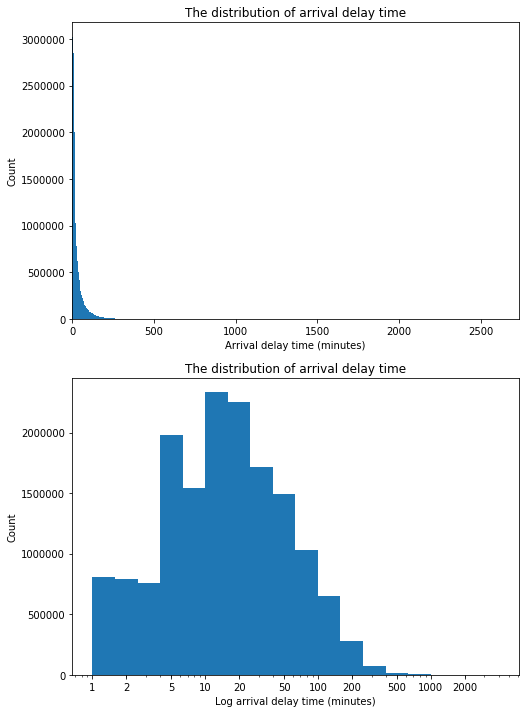

In [9]:
# Arrival delay time
bin_edges = np.arange(0, flight.arrdelay_time.max() + 5, 5)

plt.figure(figsize = (8, 12))
plt.subplot(2, 1, 1)
plt.hist(data = flight.query('arrdelay_time > 0'), x = 'arrdelay_time', bins = bin_edges)
plt.xlim(0,)
plt.title('The distribution of arrival delay time')
plt.xlabel('Arrival delay time (minutes)')
plt.ylabel('Count');

plt.subplot(2, 1, 2)
bin_edges = 10 ** np.arange(0, np.log10(flight.arrdelay_time.max()) + .2, .2)
plt.hist(data = flight.query('arrdelay_time > 0'), x = 'arrdelay_time', bins = bin_edges)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000])
plt.title('The distribution of arrival delay time')
plt.xlabel('Log arrival delay time (minutes)')
plt.ylabel('Count');

Most of arrival delay time are under 100 minutes. There are not too many long delay time; nevertheless, I am curious about why there are delay time longer than 500 minutes or more; It is too long for passengers to wait. Let's look 15 data whose delay time longer than 500 minutes.

In [10]:
np.random.seed(1)
flight.query('arrdelay_time > 500').sample(15)

,year,month,day_of_week,carrier,arrdelay_time,destination,distance,cancellation_code,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arrival_status
26244519,2007,8,4,AA,724.000000,DCA,920,None,724.000000,0.000000,0.000000,0.000000,0.000000,Delay
25539711,2007,7,7,NW,732.000000,FAR,223,None,680.000000,0.000000,19.000000,0.000000,33.000000,Delay
18169264,2006,7,4,NW,1034.000000,MSP,1020,None,0.000000,1020.000000,14.000000,0.000000,0.000000,Delay
15653929,2006,3,4,DL,529.000000,KOA,2966,None,529.000000,0.000000,0.000000,0.000000,0.000000,Delay
17095246,2006,5,7,CO,559.000000,LAX,1379,None,559.000000,0.000000,0.000000,0.000000,0.000000,Delay
32329526,2008,6,1,AS,607.000000,PDX,1009,None,607.000000,0.000000,0.000000,0.000000,0.000000,Delay
29275294,2008,1,2,9E,973.000000,DTW,128,None,973.000000,0.000000,0.000000,0.000000,0.000000,Delay
17546954,2006,6,4,NW,1016.000000,MSP,1426,None,11.000000,0.000000,0.000000,0.000000,1005.000000,Delay
28644992,2007,12,7,NW,814.000000,MEM,946,None,773.000000,41.000000,0.000000,0.000000,0.000000,Delay
32724290,2008,7,2,DL,549.000000,SLC,1989,None,508.000000,0.000000,41.000000,0.000000,0.000000,Delay


From 15 sampled data, maybe extremely longer delay is caused by carrier.

Next up, I will look at the number of flights that are operated by each carrier, for I expect it have higher relation with delay or cancel.

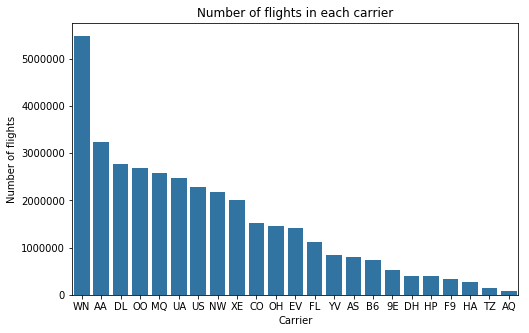

In [11]:
# The distribution of carrier
carrier_count = flight.groupby(['carrier']).size().sort_values(ascending = False)
color_base = sb.color_palette()[0]

plt.subplots(figsize = (8,5))
sb.countplot(data = flight, x = 'carrier', color = color_base, order = carrier_count.index)
locs, labels = plt.xticks()
plt.title('Number of flights in each carrier')
plt.xlabel('Carrier')
plt.ylabel('Number of flights');

The carrier WN has the most number of flights, and its number is far greater than other carriers. In addition, I think the more the flights the more delays and cancels. In the later exploration, I will use proportion to see which carrier has more delays or cancels.

I will move on to the reason of cancelled and delayed flights. First is the reason of cancellation.

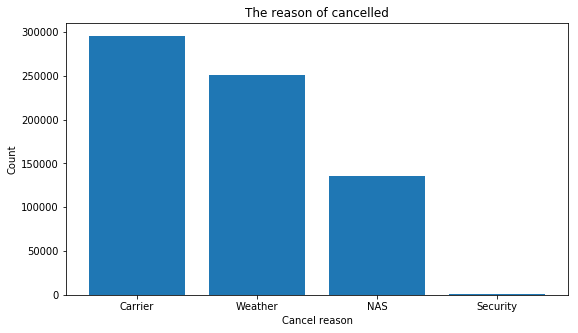

In [12]:
# Cancelled reason
cancel_count = flight.groupby(['cancellation_code']).size().sort_values(ascending = False)[['Carrier', 'Weather', 'NAS', 'Security']]
color_base = sb.color_palette()[0]

plt.subplots(figsize = (9,5))
plt.bar(x = cancel_count.index, height = cancel_count.values, color = color_base)
plt.title('The reason of cancelled')
plt.xlabel('Cancel reason')
plt.ylabel('Count');

The main reason of cancellation is carrier, weather is the second, and NAS is the third. I also notice there are a little reason caused by security.

In the following, I will look at the delay time of each delay reason.

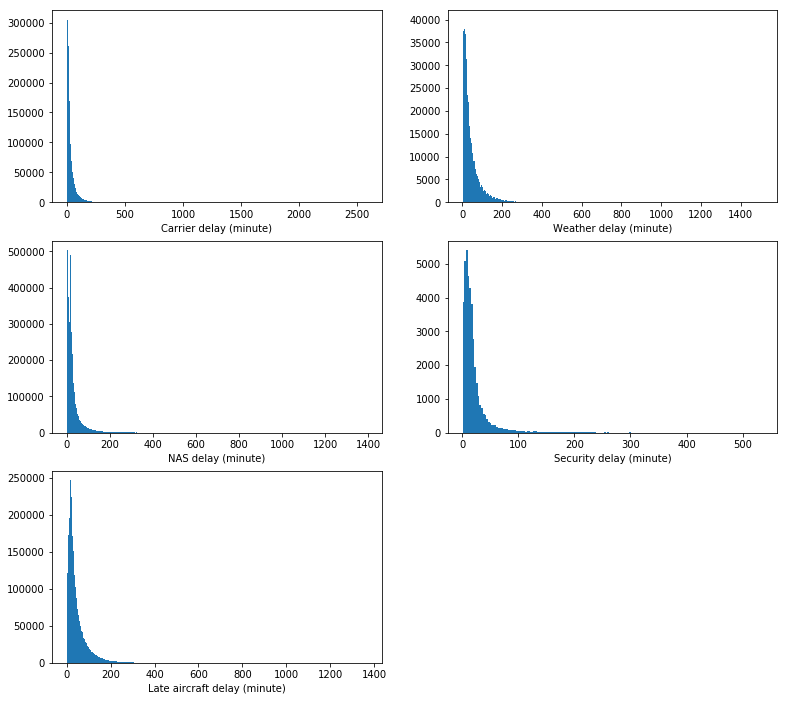

In [13]:
plt.figure(figsize = (13, 12))

# carrier delay
plt.subplot(3, 2, 1)
carrier_bin = np.arange(1, flight.carrier_delay.max()+3, 3)
plt.hist(data = flight, x = 'carrier_delay', bins = carrier_bin)
plt.xlabel('Carrier delay (minute)');

# weather delay
plt.subplot(3, 2, 2)
weather_bin = np.arange(1, flight.weather_delay.max()+3, 3)
plt.hist(data = flight, x = 'weather_delay', bins = weather_bin)
plt.xlabel('Weather delay (minute)');

# nas delay
plt.subplot(3, 2, 3)
nas_bin = np.arange(1, flight.nas_delay.max()+3, 3)
plt.hist(data = flight, x = 'nas_delay', bins = nas_bin)
plt.xlabel('NAS delay (minute)');

# security delay
plt.subplot(3, 2, 4)
security_bin = np.arange(1, flight.security_delay.max()+3, 3)
plt.hist(data = flight, x = 'security_delay', bins = security_bin)
plt.xlabel('Security delay (minute)');

# late aircraft delay
plt.subplot(3, 2, 5)
late_aircraft_bin = np.arange(1, flight.late_aircraft_delay.max()+3, 3)
plt.hist(data = flight, x = 'late_aircraft_delay', bins = late_aircraft_bin)
plt.xlabel('Late aircraft delay (minute)');

All five variables highly skew to right; hence, I will take log transformation on each of them in the next.

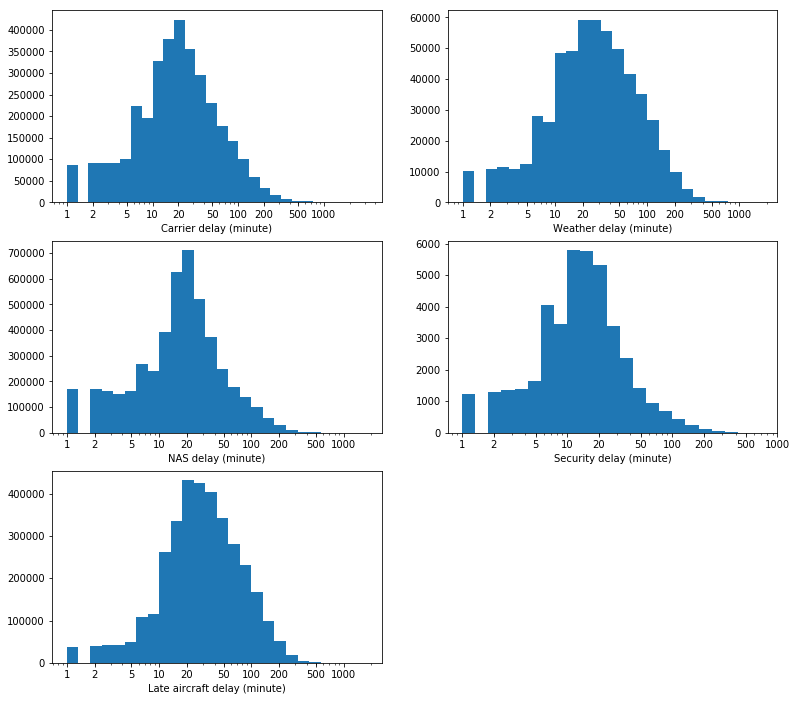

In [14]:
plt.figure(figsize = (13, 12))

# carrier delay
plt.subplot(3, 2, 1)
carrier_bin = 10 ** np.arange(0, np.log10(flight.carrier_delay.max())+.125, .125)
plt.hist(data = flight, x = 'carrier_delay', bins = carrier_bin)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])
plt.xlabel('Carrier delay (minute)');

# weather delay
plt.subplot(3, 2, 2)
weather_bin = 10 ** np.arange(0, np.log10(flight.weather_delay.max())+.125, .125)
plt.hist(data = flight, x = 'weather_delay', bins = weather_bin)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])
plt.xlabel('Weather delay (minute)');

# nas delay
plt.subplot(3, 2, 3)
nas_bin = 10 ** np.arange(0, np.log10(flight.nas_delay.max())+.125, .125)
plt.hist(data = flight, x = 'nas_delay', bins = nas_bin)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])
plt.xlabel('NAS delay (minute)');

# security delay
plt.subplot(3, 2, 4)
security_bin = 10 ** np.arange(0, np.log10(flight.security_delay.max())+.125, .125)
plt.hist(data = flight, x = 'security_delay', bins = security_bin)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])
plt.xlabel('Security delay (minute)');

# late aircraft delay
plt.subplot(3, 2, 5)
late_aircraft_bin = 10 ** np.arange(0, np.log10(flight.late_aircraft_delay.max())+.125, .125)
plt.hist(data = flight, x = 'late_aircraft_delay', bins = late_aircraft_bin)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])
plt.xlabel('Late aircraft delay (minute)');

From the above plot, the distribution become clear after I apply log transformation. For carrier delay and NAS delay, the peak is at around 20 minutes. For weather delay and late aircraft delay, the peak is greater than 20 minutes. For security delay, the peak is less than 20 minutes.

Now I am going to see the distribution of flights in month and in day of week.

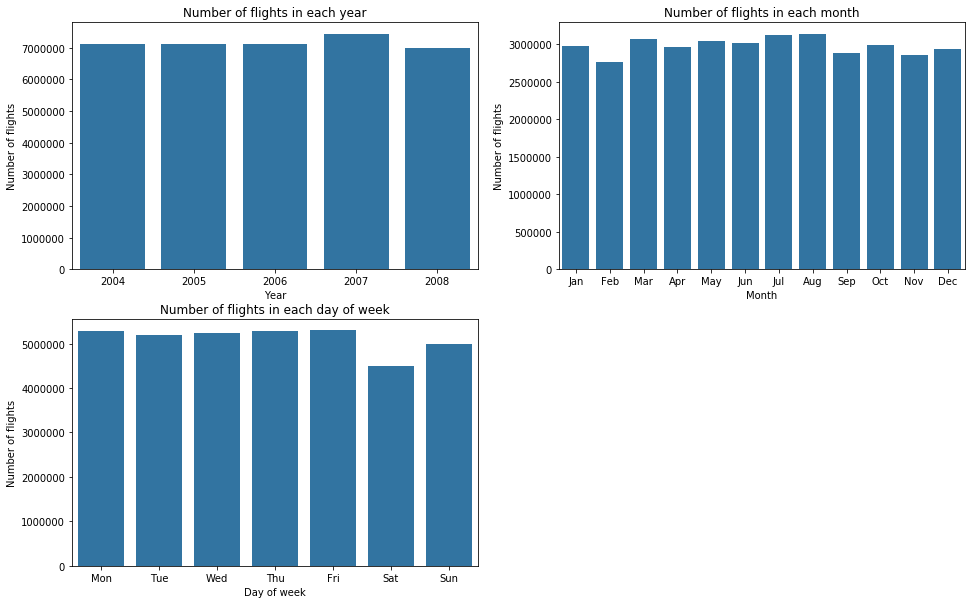

In [15]:
# To see the distribution of year, month, and day of week

color_base = sb.color_palette()[0]

plt.figure(figsize = (16,10))
plt.subplot(2, 2, 1)
sb.countplot(data = flight, x = 'year', color = color_base)
locs, labels = plt.xticks()
plt.title('Number of flights in each year')
plt.xlabel('Year')
plt.ylabel('Number of flights');

plt.subplot(2, 2, 2)
sb.countplot(data = flight, x = 'month', color = color_base)
locs, labels = plt.xticks()
plt.xticks(locs, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Number of flights in each month')
plt.xlabel('Month')
plt.ylabel('Number of flights');

plt.subplot(2, 2, 3)
sb.countplot(data = flight, x = 'day_of_week', color = color_base)
locs, labels = plt.xticks()
plt.xticks(locs, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Number of flights in each day of week')
plt.xlabel('Day of week')
plt.ylabel('Number of flights');

There are no significant difference in the number of flights in each year and in each month. To see the feature day_of_week, the flights on weekend is a little less than the flights on weekday.

The next step, I am going to see the number of flights in destination.

In [17]:
print('The number of destination: ', flight.destination.nunique())

The number of destination:  324


There are too many airports; accordingly, I will look at the top 10 destination in the next.

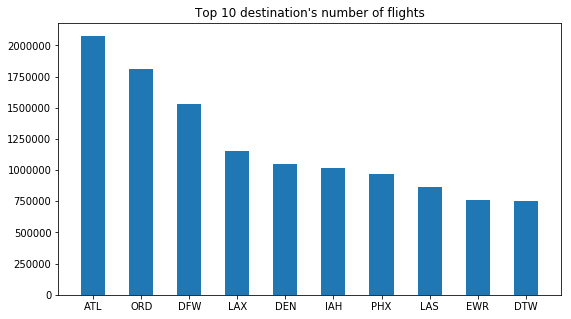

In [18]:
# Top 10 origin and destination
plt.figure(figsize = (9,5))

destination_count = flight.groupby(['destination']).size().sort_values(ascending = False)[:10]
plt.bar(x = destination_count.index, height = destination_count.values, width = .5)
plt.title("Top 10 destination's number of flights");

It indicates these top 10 airports are the bigger airports in the United States.

In the final, I will look at the distribution of distance.

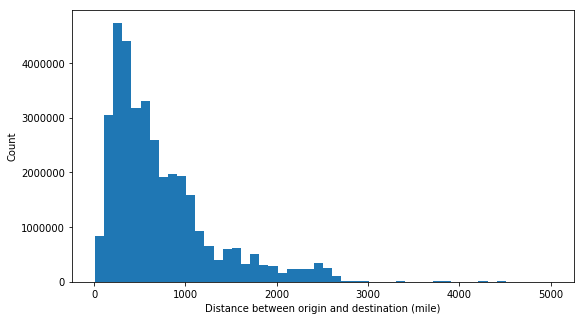

In [19]:
# Distance
bin_edges = np.arange(flight.distance.min(), flight.distance.max() + 100, 100)

plt.subplots(figsize = (9,5))
plt.hist(data = flight, x = 'distance', bins = bin_edges)
plt.xlabel('Distance between origin and destination (mile)')
plt.ylabel('Count');

The distribution of distance is right-skewed. Most of the flight distance are between 0 to 1000 miles. Only a little flights have long distance greater than 3000 miles. Let's take a log transformation.

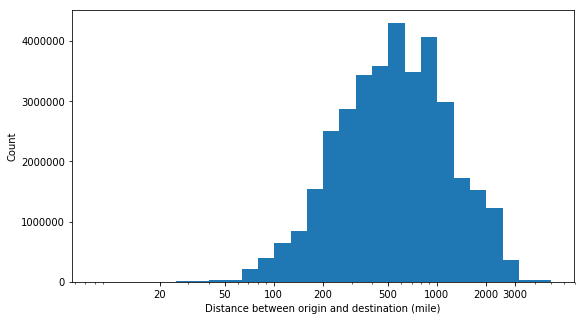

In [20]:
bin_edges = 10 ** np.arange(np.log10(flight.distance.min()), np.log10(flight.distance.max()) + .1, .1)

plt.subplots(figsize = (9,5))
plt.hist(data = flight, x = 'distance', bins = bin_edges)
plt.xscale('log')
plt.xticks([20, 50, 100, 200, 500, 1000, 2000, 3000], [20, 50, 100, 200, 500, 1000, 2000, 3000])
plt.xlabel('Distance between origin and destination (mile)')
plt.ylabel('Count');

Most distance of flights are at 200 miles to 2000 miles.

### Discuss the distributions of the variables of interest  
There are 21.9% of flights are delayed flights, and 1.9% are cancelled flights. I use log transform on arrival delay time because it is highly right-skewed. Most of the delay time are under 100 minutes, but there are some delay time greater than 500 minutes or more.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
I observe the flights on weekend is a little less than the flights on weekday. The five variables of delay reason and the variable distance are highly right-skewed, so I use log transform.

## Bivariate Exploration

Before bivariate exploration, I will plot correlation matrix to see the correlation between numeric variables.

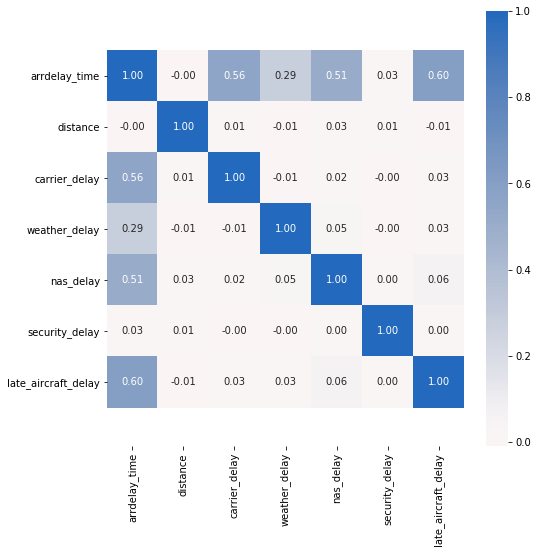

In [21]:
# correlation matrix
plt.figure(figsize = (8, 8))
sb.heatmap(flight.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.axis('equal');

I want to know which feature has higher correlation with arrival delay time. In the correlation matrix, arrival delay time has higher correlation with carrier delay time, NAS delay time, and late aircraft delay time.

### Part1: main features of interest versus carrier  
In this part, carrier will be ordered by its total flights. From left to right is greatest to least.

First, I will look at the arrival status(delay and cancelled) by carrier.

In [22]:
# carrier and arrival status(delay and cancel). Order by carrier's total flights.
carrier_count = flight.groupby(['carrier', 'arrival_status']).size()
carrier_total = flight.groupby(['carrier']).size()
carrier_count = (carrier_count/carrier_total).reset_index(name = 'proportion')
carrier_order = flight.groupby(['carrier']).size().sort_values(ascending = False)

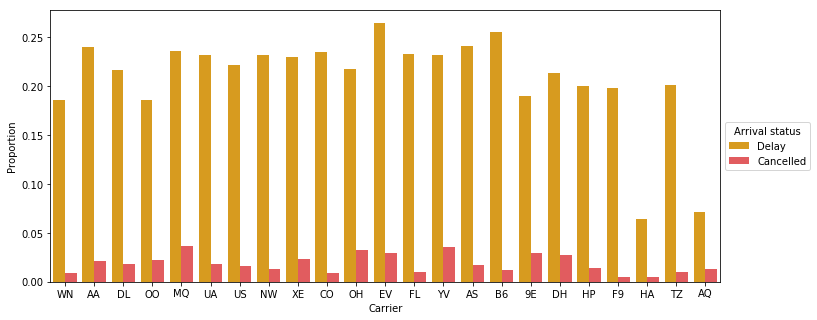

In [23]:
plt.figure(figsize = (12,5))
sb.barplot(data = carrier_count.query('arrival_status in ["Delay", "Cancelled"]'), x = 'carrier', y = 'proportion', hue = 'arrival_status',
           order = carrier_order.index, hue_order = ['Delay', 'Cancelled'], palette = {'Delay':'#F6A500', 'Cancelled':'#F7464A'})
plt.xlabel('Carrier')
plt.ylabel('Proportion')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Arrival status');

I order the x-axis ticks by carrier's total flights. The plot implies the carrier has higher flights doesn't necessory have higher delay rate or higher cancel rate. The carrier who has the highest delay rate is EV(ExpressJet). The carrier who has the highest cancel rate is MQ(Envoy Air). The carrier WN(Southwest Airlines) who has the most flights has relatively low delay rate and cancel rate.

Second, I will look at the arrival delay time by carrier. 

In [24]:
# For delayed data, I want to see carrier and its arrival delay time (use log transform)
flight['delaytime_log'] = flight['arrdelay_time'].apply(lambda x: np.log10(x))

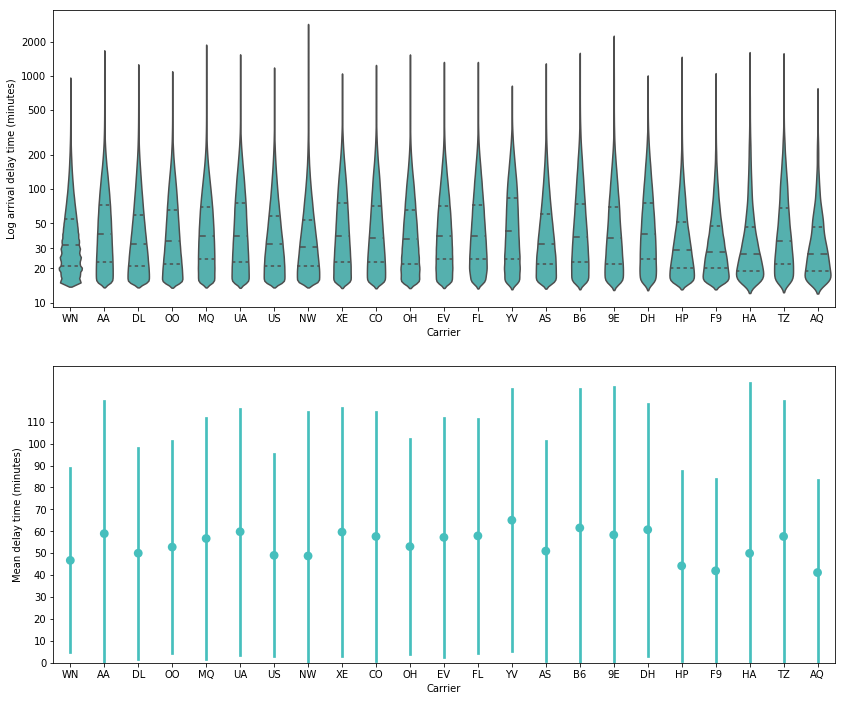

In [25]:
plt.figure(figsize = (14, 12))
plt.subplot(2, 1, 1)
sb.violinplot(data = flight.query('arrival_status == "Delay"'), x = 'carrier', y = "delaytime_log", inner = 'quartile',
              order = carrier_order.index, color = '#46BFBD')
tick_labels = [10, 20, 30, 50, 100, 200, 500, 1000, 2000]
plt.yticks(list(map(lambda x: np.log10(x), tick_labels)), tick_labels)
plt.xlabel('Carrier')
plt.ylabel('Log arrival delay time (minutes)');

plt.subplot(2, 1, 2)
sb.pointplot(data = flight.query('arrival_status == "Delay"'), x = 'carrier', y = 'arrdelay_time', color = "#46BFBD",
             order = carrier_order.index, linestyles = "", ci = 'sd')
plt.ylim(0,)
plt.yticks(np.arange(0, 120, 10), np.arange(0, 120, 10))
plt.xlabel('Carrier')
plt.ylabel('Mean delay time (minutes)');

From the plot above,YV is the arrier whose mean delay time above 60 minutes; AA, MQ, UA, XE, CO, EV, FL, B6, 9E, DH, and TZ are the arrier whose mean delay time is close to 60 minutes; HP, F9, and AQ are the carrier whose mean delay time is close to 40 minutes, and other carriers' mean delay time are around 50 minutes.

### Part2: main features of interest versus time-related features
Time-related features are year, month, and day of week.

I will plot arrival status versus time-related features at first.

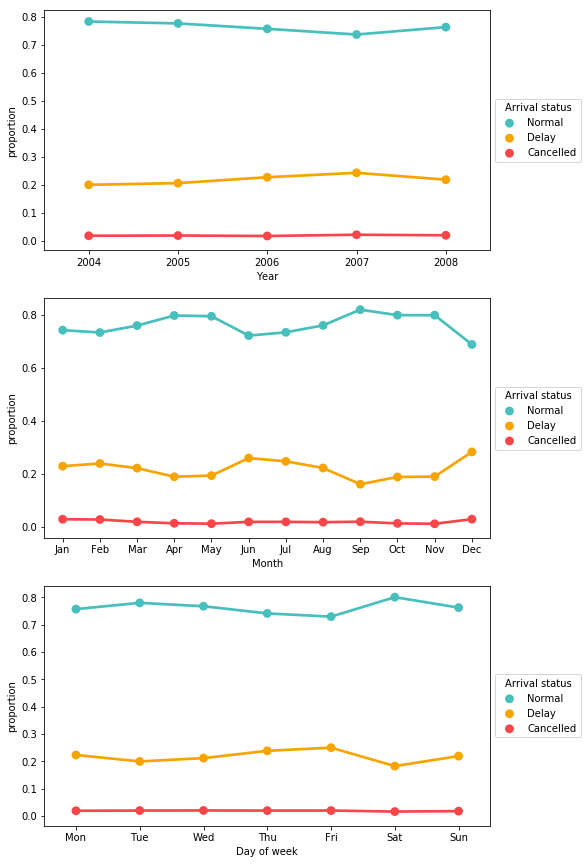

In [26]:
# To see proportion of arrival status by year, by month, and by day of week
# year
year_count = flight.groupby(['year', 'arrival_status']).size()
year_total = flight.groupby(['year']).size()
year_count = (year_count/year_total).reset_index(name = 'proportion')
# month
month_count = flight.groupby(['month', 'arrival_status']).size()
month_total = flight.groupby(['month']).size()
month_count = (month_count/month_total).reset_index(name = 'proportion')
# day of week
week_count = flight.groupby(['day_of_week', 'arrival_status']).size()
week_total = flight.groupby(['day_of_week']).size()
week_count = (week_count/week_total).reset_index(name = 'proportion')

plt.figure(figsize = (8,15))

# by year
plt.subplot(3,1,1)
sb.pointplot(data = year_count, x = 'year', y = 'proportion', hue = 'arrival_status', hue_order = ['Normal', 'Delay', 'Cancelled'],
             palette = {"Normal":"#46BFBD", "Delay":"#F6A500", "Cancelled":"#F7464A"})
plt.xlabel('Year')
plt.ylabel('proportion')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Arrival status');

# by month
plt.subplot(3,1,2)
sb.pointplot(data = month_count, x = 'month', y = 'proportion', hue = 'arrival_status', hue_order = ['Normal', 'Delay', 'Cancelled'],
             palette = {"Normal":"#46BFBD", "Delay":"#F6A500", "Cancelled":"#F7464A"})
locs, labels = plt.xticks()
plt.xticks(locs, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Arrival status');

# by day of week
plt.subplot(3,1,3)
sb.pointplot(data = week_count, x = 'day_of_week', y = 'proportion', hue = 'arrival_status', hue_order = ['Normal', 'Delay', 'Cancelled'],
             palette = {"Normal":"#46BFBD", "Delay":"#F6A500", "Cancelled":"#F7464A"})
locs, labels = plt.xticks()
plt.xticks(locs, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of week')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Arrival status');

Each arrival status do not have significant difference from year to year. Nevertheless, in the figure that plot by month I find that in June, July,and December have reletavely higher delay rate. Also, look at the line that represents delay; delay rate in summer and in winter are lower than in spring and in autumn. In the last figure, I see that delay time in Saturday is reletively lower than other day.

Next up, I will look at the arrival delay time's distribution by time-based features; furthermore, I will look at the mean of arrival delay time by time-based featured. I will use arrival delay time with log transform.

In [27]:
def delaytime_time(x, x_label, xtick_label):
    plt.figure(figsize = (14,5))

    plt.subplot(1, 2, 1)
    sb.boxplot(data = flight.query('arrival_status == "Delay"'), x = x, y = 'delaytime_log', color = '#46BFBD')
    tick_labels = [10, 20, 30, 50, 100, 200, 500, 1000, 2000]
    plt.yticks(list(map(lambda x: np.log10(x), tick_labels)), tick_labels)
    plt.xlabel(x_label)
    plt.ylabel('Log arrival delay time (minutes)')
    locs, labels = plt.xticks()
    plt.xticks(locs, xtick_label);

    plt.subplot(1, 2, 2)
    delaytime_mean = flight.query('arrival_status == "Delay"').groupby(x).mean()['arrdelay_time'].reset_index(name = 'mean_delaytime')
    sb.pointplot(data = delaytime_mean, x = x, y = 'mean_delaytime', color = "#46BFBD")
    plt.ylim(0,80)
    plt.xlabel(x_label)
    plt.ylabel('Mean delay time (minutes)')
    locs, labels = plt.xticks()
    plt.xticks(locs, xtick_label);
    
    plt.show()

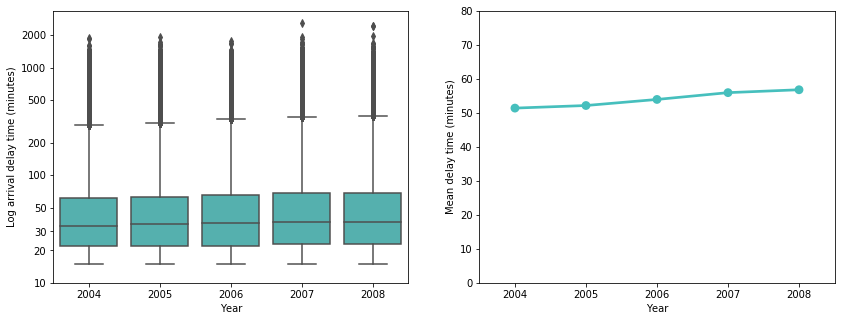

In [28]:
# by year
delaytime_time('year', 'Year', ['2004', '2005', '2006', '2007', '2008'])

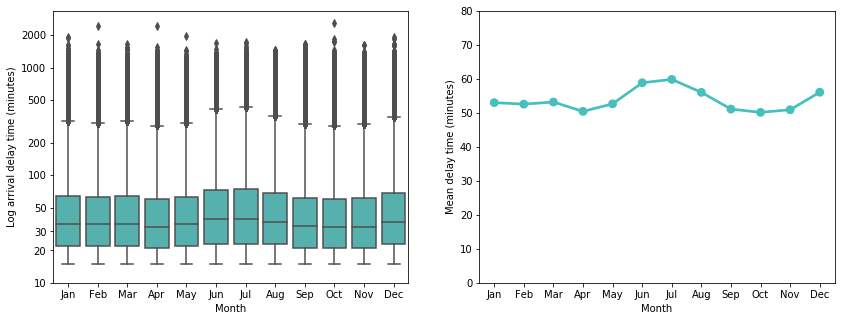

In [29]:
# by month
delaytime_time('month', 'Month', ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

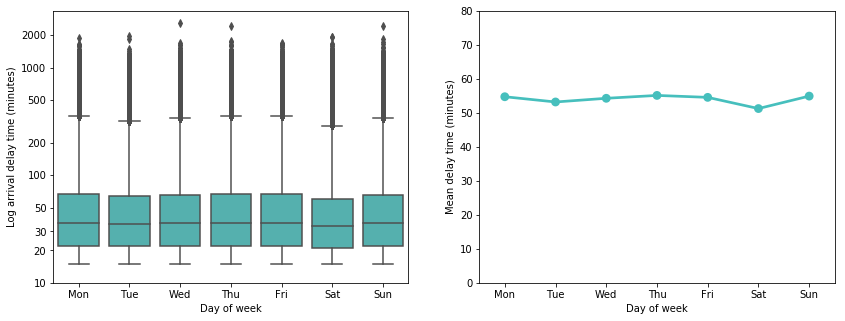

In [30]:
# by day of week
delaytime_time('day_of_week', 'Day of week', ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

Let's look at the mean delay time's trend by time-based features. From 2004 to 2008, the dalay time slightly increasing. There is longer delay time, which is close to 60 minutes, in June, July, August, and December while other months' delay time is around 50 minutes. Finally, there is no significant trend in day of week.

### Part3: cancel reason and delay reason
In this part, I will look at cancel reason then move on to look at delay reason.

First, I want to see the cancel reason in different carriers.

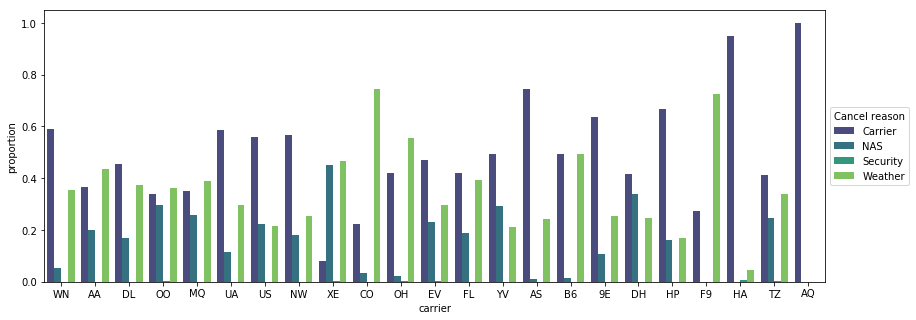

In [31]:
flight_cancel = flight.query('arrival_status == "Cancelled"')
    
x_count = flight_cancel.groupby(['carrier', 'cancellation_code']).size()
x_total = flight_cancel.groupby(['carrier']).size()
x_count = (x_count/x_total).reset_index(name = 'proportion')
    
plt.figure(figsize = (14, 5))
sb.barplot(data = x_count, x = 'carrier', y = 'proportion', hue = 'cancellation_code', order = carrier_order.index, 
             hue_order = ['Carrier', 'NAS', 'Security', 'Weather'], palette = 'viridis')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Cancel reason');

Carrier is the main flights cancel reason in most carriers, and weather is also the important reason. Something interesting is CO and F9, the main cancel reason of this two carriers is weather, and it occupy a large proportion. The carrier XE has higher proportion flights that were cancelled due to NAS reason.

Second, I will look at cancel reason and time-based features. I wonder if there is certain reason for cancelled flights at certain time.

In [32]:
# cancel reason and time-based features
def cancel_reason(x, x_label, x_tick):
    flight_cancel = flight.query('arrival_status == "Cancelled"')
    
    x_count = flight_cancel.groupby([x, 'cancellation_code']).size()
    x_total = flight_cancel.groupby([x]).size()
    x_count = (x_count/x_total).reset_index(name = 'proportion')
    
    plt.figure(figsize = (8, 5))
    sb.pointplot(data = x_count, x = x, y = 'proportion', hue = 'cancellation_code', 
                 hue_order = ['Carrier', 'Weather', 'NAS', 'Security'], palette = 'viridis')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Cancel reason')
    locs, labels = plt.xticks()
    plt.xticks(locs, x_tick)
    plt.xlabel(x_label)
    plt.ylabel('proportion');
    
    plt.show()

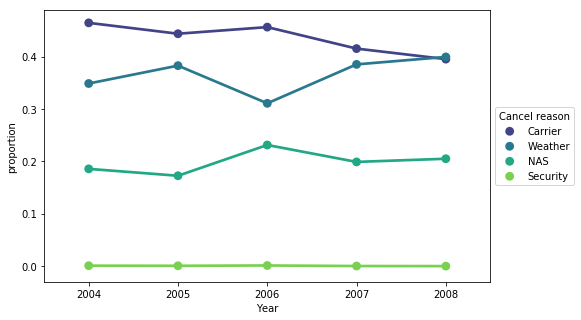

In [33]:
# year 
cancel_reason('year', 'Year', ['2004', '2005', '2006', '2007', '2008']);

In each year, **carrier** and **weather** is the main reason of cancelled flights. From 2004 to 2007, carrier is the first place; nevertheless, weather has almost same proportion with carrier in 2008.

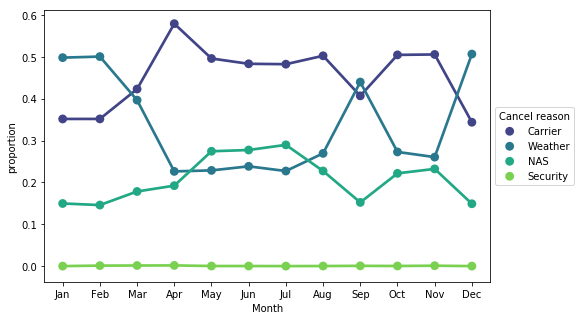

In [34]:
# month
cancel_reason('month', 'Month', ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

In January, Febrary, and December, the main cancel reason is **weather**. In April, May, June, July, Auguest, October, and November, the main cancel reason is **carrier**. In March and September, **carrier** and **weather** are both the main reason of cancelled flights.

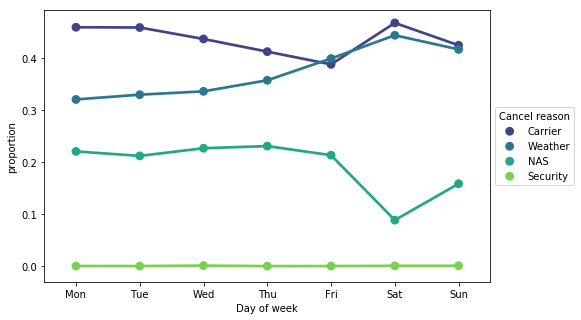

In [35]:
# day of week
cancel_reason('day_of_week', 'Day of week', ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

**Carrier** is the main reason of cancelled flights on every day of week.

In the end of this part, I will look at the relationship between delay time and delay reason.

In [36]:
flight_sub = flight.query('arrival_status == "Delay"')[['arrdelay_time', 'delaytime_log', 'carrier_delay', 'nas_delay', 'late_aircraft_delay', 'security_delay', 'weather_delay']]
flight_sub['carrier_delay_log'] = flight['carrier_delay'].apply(lambda x: np.log10(x+.1))
flight_sub['nas_delay_log'] = flight['nas_delay'].apply(lambda x: np.log10(x+.1))
flight_sub['late_aircraft_delay_log'] = flight['late_aircraft_delay'].apply(lambda x: np.log10(x+.1))
flight_sub['security_delay_log'] = flight['security_delay'].apply(lambda x: np.log10(x+.1))
flight_sub['weather_delay_log'] = flight['weather_delay'].apply(lambda x: np.log10(x+.1))
flight_sub.fillna(0, inplace = True)

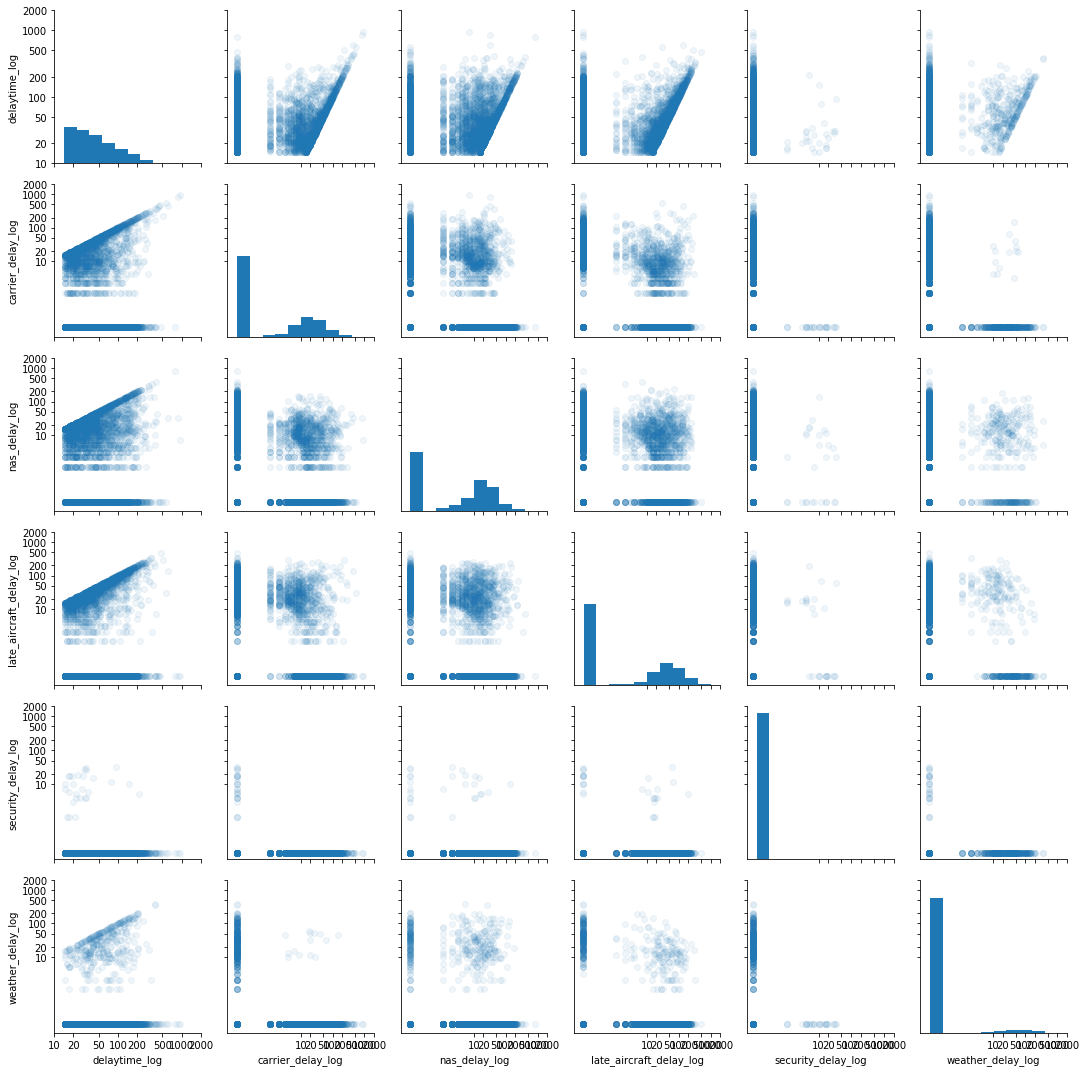

In [37]:
np.random.seed(15)
var = ['delaytime_log', 'carrier_delay_log', 'nas_delay_log', 'late_aircraft_delay_log', 'security_delay_log', 'weather_delay_log']
g = sb.PairGrid(data = flight_sub.sample(5000), vars = var)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha = 1/15)
tick_label = [10, 20, 50, 100, 200, 500, 1000, 2000]
g.set(xticks = list(map(lambda x: np.log10(x), tick_label)), xticklabels = tick_label)
g.set(yticks = list(map(lambda x: np.log10(x), tick_label)), yticklabels = tick_label);

In [38]:
reason_delaytime = flight.query('arrival_status == "Delay"')[['carrier_delay', 'nas_delay', 'late_aircraft_delay', 'security_delay', 'weather_delay']].sum(axis = 0).sort_values(ascending = False).reset_index()
reason_delaytime.columns = ['delay_reason', 'total_time']

In [39]:
reason_delaytime

,delay_reason,total_time
0,late_aircraft_delay,152644497.000000
1,nas_delay,128501285.000000
2,carrier_delay,117386282.000000
3,weather_delay,24978350.000000
4,security_delay,832857.000000


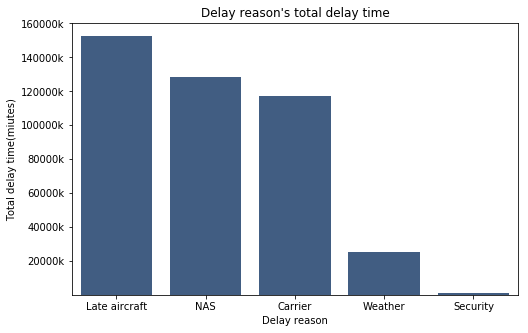

In [40]:
color_base = sb.color_palette('viridis')[1]
plt.figure(figsize = (8, 5))
sb.barplot(data = reason_delaytime, x = 'delay_reason', y = 'total_time', color = color_base)
plt.xticks([0,1,2,3,4], ['Late aircraft', 'NAS', 'Carrier', 'Weather', 'Security'])
plt.yticks([2e7, 4e7, 6e7, 8e7, 1e8, 1.2e8, 1.4e8, 1.6e8],['20000k', '40000k', '60000k', '80000k', '100000k', '120000k', '140000k', '160000k'])
plt.title("Delay reason's total delay time" )
plt.xlabel('Delay reason')
plt.ylabel('Total delay time(miutes)');

Carrier delay time, NAS delay time, and late aircraft delay time have positive relation with arrival delay time. It means carrier, NAS, and late aircraft are the main reasons of flights' delay.

### Part4: main features of interest versus destination

In this part, I want to see which destination has the more delayed flights or cancelled flights, and I also want to see which destination has longer delay time.

In [42]:
delay_df = flight.query('arrival_status == "Delay"')
dest_total = flight.groupby(['destination']).size()
dest_delay = delay_df.groupby('destination').size()
dest10_delay = (dest_delay/dest_total)[destination_count.index].sort_values(ascending = False).reset_index(name = 'proportion')

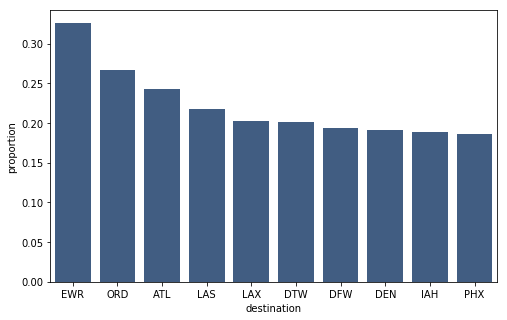

In [43]:
# Top 10 destination with great delayed flight
color_base = sb.color_palette('viridis')[1]
plt.figure(figsize = (8, 5))
sb.barplot(data = dest10_delay , x = 'destination', y = 'proportion', color = color_base);

The destination that has the most delayed flights is EWR, which is located in the US state of New Jersey and is the fifteenth busiest airport in the US. The second is ORD, which is the major airport in Chicago. The third is ATL, which is located in Atlanta and is the world's busiest airport.

In [44]:
dest_delaytime = delay_df.groupby('destination').mean()['arrdelay_time'].sort_values(ascending = False)[destination_count.index]
dest_delaytime = dest_delaytime.sort_values(ascending = False).reset_index()

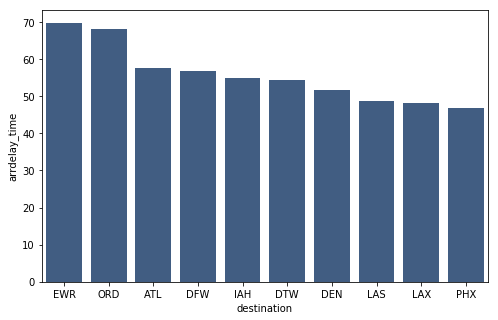

In [45]:
color_base = sb.color_palette('viridis')[1]
plt.figure(figsize = (8, 5))
sb.barplot(data = dest_delaytime, x = 'destination', y = 'arrdelay_time', color = color_base);

In top 10 destination which has the longest delay time is EWR. The second destination is ORD, and the third is ATL. They are the same as top 3 destinations that have larger proportion of delayed flights.

In [47]:
cancel_df = flight.query('arrival_status == "Cancelled"')
dest_cancel = cancel_df.groupby('destination').size()
dest10_cancel = (dest_cancel/dest_total)[destination_count.index].sort_values(ascending = False).reset_index(name = 'proportion')

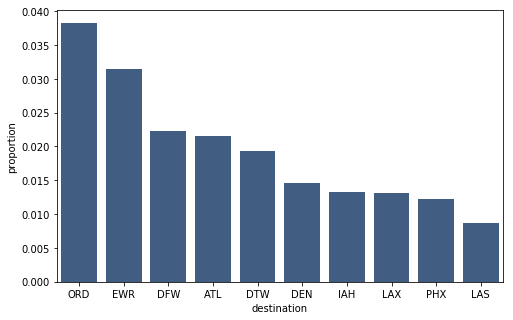

In [48]:
# Top 10 destination with great cancelled flight
color_base = sb.color_palette('viridis')[1]
plt.figure(figsize = (8, 5))
sb.barplot(data = dest10_cancel , x = 'destination', y = 'proportion', color = color_base);

Cancelled flights occupy little proportion of all flights in every destinations. Top 3 destinations that have higher prportion of cancelled flights are ORD, EWR ,and DFW. DFW is locted in the U.S. state of Texa and is the fourth busiest airport in the world.

## Multivariate Exploration

In multivariate exploration, I want to see whether the trend of the mean delay time is similar from year to year.

I will plot to see if the trend of monthly delay time is similar from year to year.

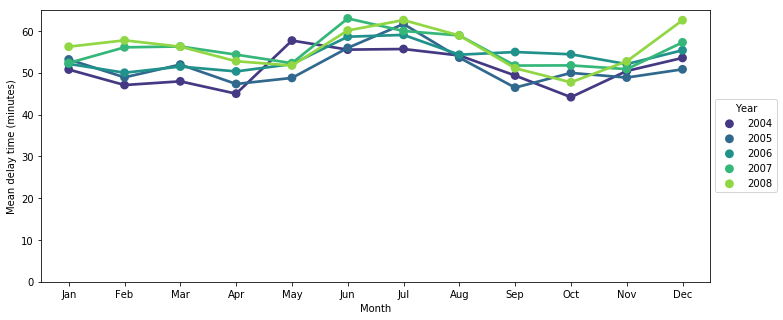

In [49]:
# delay time , month, and year
plt.figure(figsize = (12, 5))
sb.pointplot(data = delay_df, x = 'month', y = 'arrdelay_time', hue = 'year', ci = None, palette = "viridis")
plt.ylim(0, 65)
locs, labels = plt.xticks()
x_tick = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(locs, x_tick)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Year')
plt.xlabel('Month')
plt.ylabel('Mean delay time (minutes)');

Actually from the plot, we can see that the trend of monthly delay is similar from year to year.

Next up, let's move on to look at delay time of each reason by carriers.

In [50]:
delay_reason = delay_df.groupby('carrier').mean()[['carrier_delay', 'nas_delay', 'security_delay', 'weather_delay', 'late_aircraft_delay']].reset_index()
delay_reason = pd.melt(delay_reason, id_vars = ['carrier'], value_vars = ['carrier_delay', 'nas_delay', 'security_delay', 'weather_delay', 'late_aircraft_delay'],
        var_name = 'reason', value_name = 'delay_time')

C:\Users\User\Anaconda3\envs\DAP\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


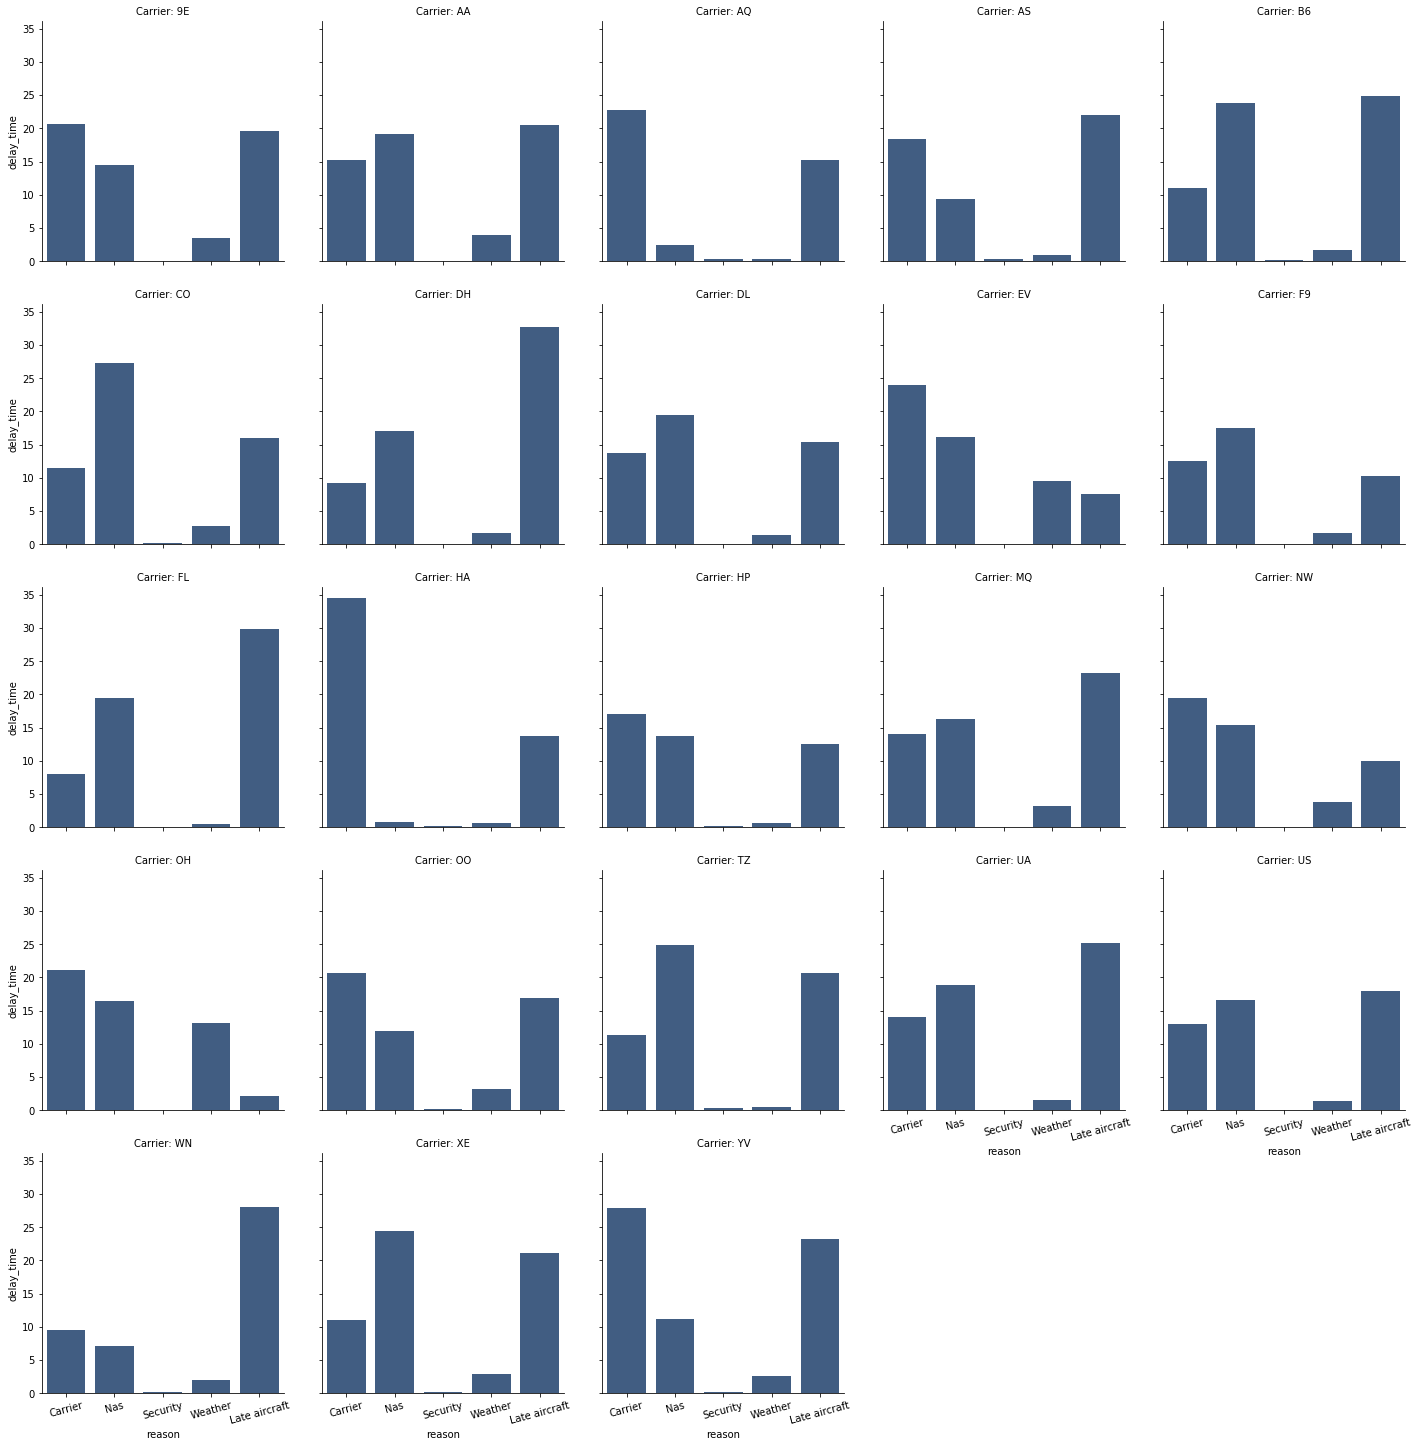

In [51]:
# carrier and mean delay time of each reason
g = sb.FacetGrid(data = delay_reason, col = 'carrier', col_wrap = 5, size = 4)
g.map(sb.barplot, 'reason', 'delay_time', ci = None, color = sb.color_palette('viridis')[1], 
      order = ['carrier_delay', 'nas_delay', 'security_delay', 'weather_delay', 'late_aircraft_delay'])
x_tick = ['Carrier', 'Nas', 'Security', 'Weather', 'Late aircraft']
g.set(xticklabels = x_tick)
g.set_titles('Carrier: {col_name}')
g.set_xticklabels(rotation = 15);

For most carriers, main reason of delayed filghts are carrier and late aircraft. Some carriers' main delay reason is NAS.